In [23]:
#Read CSV file and install packages
import numpy as np
import pandas as pd
import scipy as sp

df = pd.read_csv('INF2178_A1_data.csv')

In [24]:
#Calculate the occupancy rate
df['BED_OCCUPANCY_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['ROOM_OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

bed_based = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']
room_based = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']

#Remove NAN
bed_based_occupancy_rates = bed_based['BED_OCCUPANCY_RATE'].dropna()
room_based_occupancy_rates = room_based['ROOM_OCCUPANCY_RATE'].dropna()

N1 = len(bed_based_occupancy_rates)
N2 = len(room_based_occupancy_rates)

def get_summary_statistics(dataset):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    print('Occupancy Rates Statistics:')
    print('Min:', min_value)
    print('Max:', max_value)
    print('Median:', median)
    print('Mean:', mean)
    print()

print("Bed Based")
get_summary_statistics(bed_based_occupancy_rates)

print("Room Based")
get_summary_statistics(room_based_occupancy_rates)

#welch's t-test
def perform_t_test(group1, group2):
  N1 = len(group1)
  N2 = len(group2)

#degree of freedom
  dof = min(N1, N2) - 1

# Perform t-test
  t_stat, p_val = sp.stats.ttest_ind(group1, group2, equal_var=False)
  print('t-statistic =',str(t_stat))
  print('p-value =',str(p_val))
  print('Degrees of freedom =', dof)


perform_t_test(bed_based_occupancy_rates, room_based_occupancy_rates)

Bed Based
Occupancy Rates Statistics:
Min: 0.02
Max: 1.0
Median: 1.0
Mean: 0.93

Room Based
Occupancy Rates Statistics:
Min: 0.01
Max: 1.01
Median: 1.0
Mean: 0.93

t-statistic = -4.498751771925636
p-value = 6.860477551487939e-06
Degrees of freedom = 18544


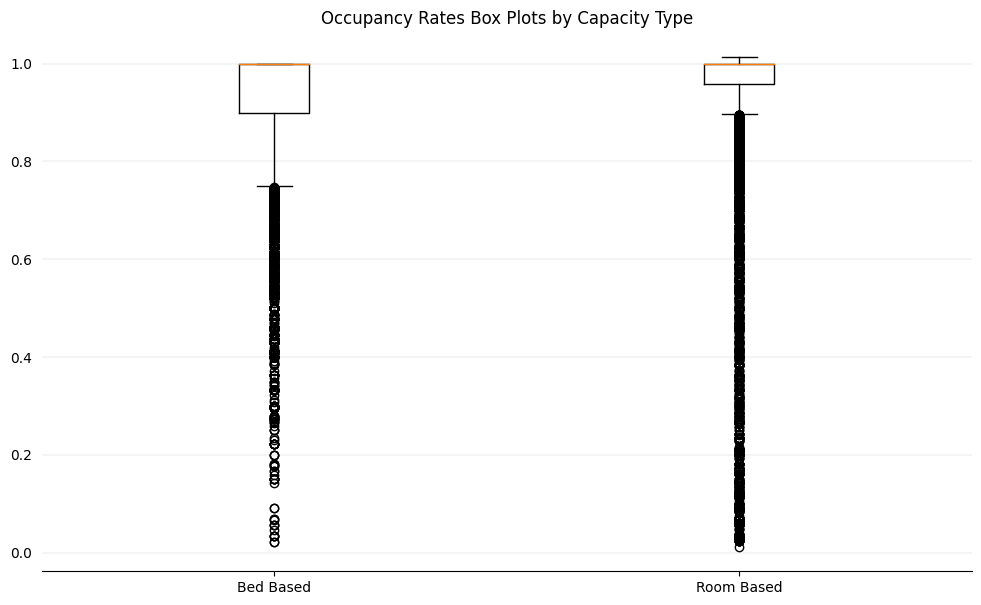

In [31]:
import matplotlib.pyplot as plt

# Setting up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Occupancy Rates Box Plots by Capacity Type')

# Prepare the dataset
dataset = [bed_based_occupancy_rates, room_based_occupancy_rates]
labels = ['Bed Based', 'Room Based']

# Plotting the boxplot
ax.boxplot(dataset, labels=labels)
plt.show()


In [42]:
#Calculate actual bed capacities
group1_capacity = df[df['OVERNIGHT_SERVICE_TYPE'] == 'Motel/Hotel Shelter']['CAPACITY_ACTUAL_BED'].dropna()
group2_capacity = df[df['OVERNIGHT_SERVICE_TYPE'] == 'Shelter']['CAPACITY_ACTUAL_BED'].dropna()

def get_summary_statistics(dataset, category_label):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    print(f'{category_label} Occupancy Rates Statistics:')
    print('Min:', min_value)
    print('Max:', max_value)
    print('Median:', median)
    print('Mean:', mean)
    print()

#Display summary statistics for both groups
get_summary_statistics(group1_capacity, "Motel/Hotel Shelter")
get_summary_statistics(group2_capacity, "Shelter")

# Perform Welch's t-test
def perform_t_test(group1, group2):
    N1 = len(group1)
    N2 = len(group2)
    dof = min(N1, N2) - 1
    t_stat, p_val = sp.stats.ttest_ind(group1, group2, equal_var=False)

    print('t-statistic =',str(t_stat))
    print('p-value =',str(p_val))
    print('Degrees of freedom =', dof)
    return t_stat, p_val
t_stat, p_val =perform_t_test(group1_capacity, group2_capacity)

# Set the significance level as 0.05
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference in actual bed capacity between Motel/Hotel Shelter and Shelter.")
else:
    print("There is no significant difference in actual bed capacity between Motel/Hotel Shelter and Shelter.")


Motel/Hotel Shelter Occupancy Rates Statistics:
Min: 42.0
Max: 131.0
Median: 98.0
Mean: 97.85

Shelter Occupancy Rates Statistics:
Min: 1.0
Max: 234.0
Median: 24.0
Mean: 29.66

t-statistic = 37.19940662556716
p-value = 1.029190825441981e-85
Degrees of freedom = 175
There is a significant difference in actual bed capacity between Motel/Hotel Shelter and Shelter.


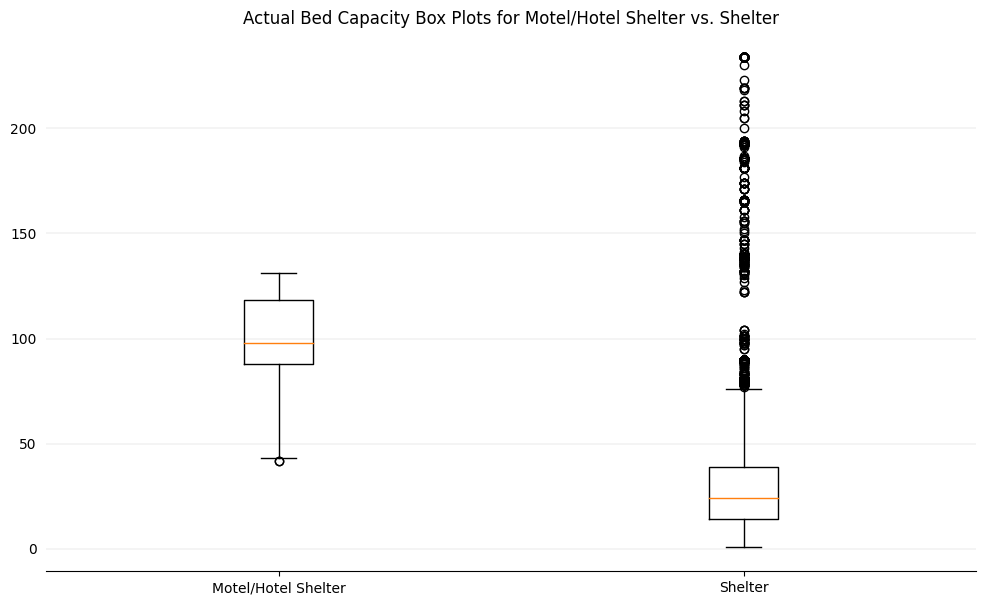

In [43]:
# Setting up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Actual Bed Capacity Box Plots for Motel/Hotel Shelter vs. Shelter')

# Prepare the dataset
dataset = [group1_capacity, group2_capacity]
labels = ['Motel/Hotel Shelter', 'Shelter']

# Plotting the boxplot
ax.boxplot(dataset, labels=labels)
plt.show()

In [44]:
#Calculate actual bed capacities
group1_capacity = df[df['PROGRAM_MODEL'] == 'Emergency']['CAPACITY_ACTUAL_BED'].dropna()
group2_capacity = df[df['PROGRAM_MODEL'] == 'Transitional']['CAPACITY_ACTUAL_BED'].dropna()

def get_summary_statistics(dataset, category_label):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    print(f'{category_label} Occupancy Rates Statistics:')
    print('Min:', min_value)
    print('Max:', max_value)
    print('Median:', median)
    print('Mean:', mean)
    print()

#Display summary statistics for both groups
get_summary_statistics(group1_capacity, "Emergency")
get_summary_statistics(group2_capacity, "Transitional")

# Perform Welch's t-test
def perform_t_test(group1, group2):
    N1 = len(group1)
    N2 = len(group2)
    dof = min(N1, N2) - 1
    t_stat, p_val = sp.stats.ttest_ind(group1, group2, equal_var=False)

    print('t-statistic =',str(t_stat))
    print('p-value =',str(p_val))
    print('Degrees of freedom =', dof)
    return t_stat, p_val
t_stat, p_val =perform_t_test(group1_capacity, group2_capacity)

# Set the significance level as 0.05

alpha = 0.05
if p_val < alpha:
  print("There is a significant difference in actual bed capacity between Emergency and Transitional.")
else:
  print("There is no significant difference in actual bed capacity between Emergency and Transitional.")


Emergency Occupancy Rates Statistics:
Min: 1.0
Max: 234.0
Median: 25.0
Mean: 33.83

Transitional Occupancy Rates Statistics:
Min: 2.0
Max: 83.0
Median: 24.0
Mean: 25.59

t-statistic = 30.04557995319668
p-value = 8.12328951219356e-195
Degrees of freedom = 8670
There is a significant difference in actual bed capacity between Emergency and Transitional.


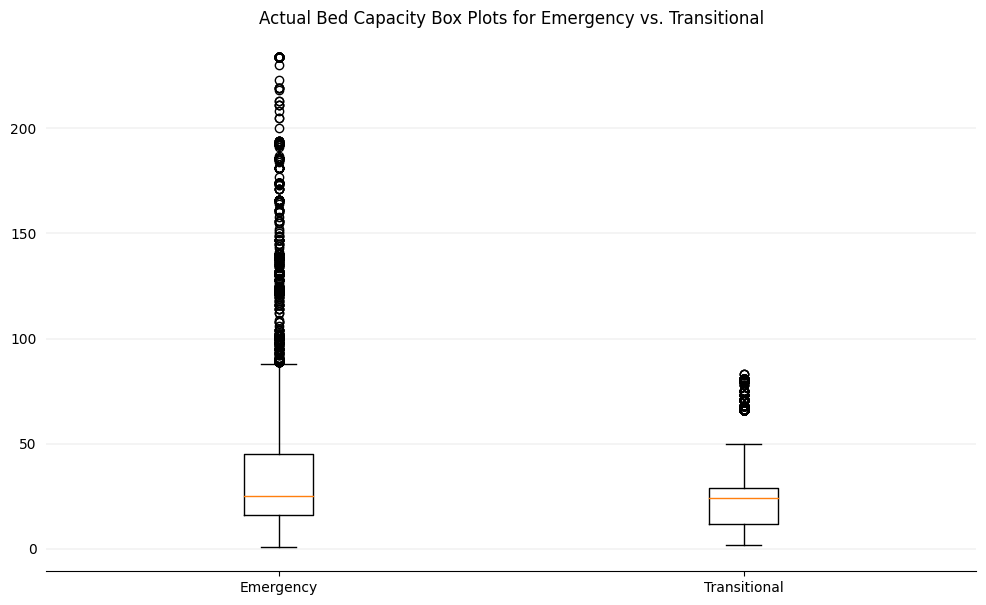

In [45]:
# Setting up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Actual Bed Capacity Box Plots for Emergency vs. Transitional')

# Prepare the dataset
dataset = [group1_capacity, group2_capacity]
labels = ['Emergency', 'Transitional']

# Plotting the boxplot
ax.boxplot(dataset, labels=labels)
plt.show()